In [37]:
# librairies
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt


Ouverture du dataset et analyse des données

In [38]:
df = pd.read_csv('./Data/loyers.csv')
df.head()

,departement,id_ville,ville,date,loyer_m2_appartement,loyer_m2_maison
0,1,1,L'Abergement-Clémenciat,2018,9.372335,8.191701
1,1,2,L'Abergement-de-Varey,2018,8.635552,7.441199
2,1,4,Ambérieu-en-Bugey,2018,10.074507,8.411184
3,1,5,Ambérieux-en-Dombes,2018,9.372335,9.039551
4,1,6,Ambléon,2018,8.966955,8.058265


In [39]:
df.shape

(70421, 6)

In [40]:
# Analyse des types de données
df.dtypes

departement              object
id_ville                  int64
ville                    object
date                      int64
loyer_m2_appartement    float64
loyer_m2_maison         float64
dtype: object

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70421 entries, 0 to 70420
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   departement           70421 non-null  object 
 1   id_ville              70421 non-null  int64  
 2   ville                 70421 non-null  object 
 3   date                  70421 non-null  int64  
 4   loyer_m2_appartement  70421 non-null  float64
 5   loyer_m2_maison       70421 non-null  float64
dtypes: float64(2), int64(2), object(2)
memory usage: 3.2+ MB


In [42]:
# Verification des valeurs nulles
df.isna().sum()
# Pas de valeurs nulles dans notre dataset.

departement             0
id_ville                0
ville                   0
date                    0
loyer_m2_appartement    0
loyer_m2_maison         0
dtype: int64

On veut avoir le prix d'un appartement ou d'une maison en fonction d'une superficie. 
On decide d'aller sur une moyenne de superficie en fonction des types d'appartement en se limitant au loft
Source : https://eldorado-immobilier.com/definition-t1t2t3t4-studio-quelle-surface-et-combien-de-pieces/
Source pour la taille moyenne d'une maison en france : https://www.lamaisonsaintgobain.fr/blog/insolites/metre-carre-et-confort-connaissez-vous-la-moyenne-francaise

Taille moyenne des logements : 
Studio - 9m²
T1 - 32m²
T1 bis- 35m²
T2 - 45m²
T2 bis - 50m²
T3 - 65 m²
T4 - 80m²
T5 - 95m²
Loft - 100m²
Maison - 113,8

In [43]:
# Creation des colonnes pour les appartements et maisons à partir de données moyennes

df['prix_appart_studio'] = 9 * df['loyer_m2_appartement']
df['prix_appart_t1'] = 32 * df['loyer_m2_appartement']
df['prix_appart_t1_bis'] = 35 * df['loyer_m2_appartement']
df['prix_appart_t2'] = 45 * df['loyer_m2_appartement']
df['prix_appart_t2_bis'] = 50 * df['loyer_m2_appartement']
df['prix_appart_t3'] = 65 * df['loyer_m2_appartement']
df['prix_appart_t4'] = 80 * df['loyer_m2_appartement']
df['prix_appart_t5'] = 95 * df['loyer_m2_appartement']
df['prix_appart_loft'] = 100 * df['loyer_m2_appartement']
df['prix_maison'] = 100 * df['loyer_m2_maison']

In [44]:
df

,departement,id_ville,ville,date,loyer_m2_appartement,loyer_m2_maison,prix_appart_studio,prix_appart_t1,prix_appart_t1_bis,prix_appart_t2,prix_appart_t2_bis,prix_appart_t3,prix_appart_t4,prix_appart_t5,prix_appart_loft,prix_maison
0,1,1,L'Abergement-Clémenciat,2018,9.372335,8.191701,84.351018,299.914731,328.031737,421.755091,468.616767,609.201798,749.786828,890.371858,937.233535,819.170110
1,1,2,L'Abergement-de-Varey,2018,8.635552,7.441199,77.719968,276.337665,302.244321,388.599841,431.777601,561.310881,690.844162,820.377442,863.555202,744.119870
2,1,4,Ambérieu-en-Bugey,2018,10.074507,8.411184,90.670564,322.384227,352.607748,453.352819,503.725354,654.842960,805.960566,957.078173,1007.450708,841.118393
3,1,5,Ambérieux-en-Dombes,2018,9.372335,9.039551,84.351018,299.914731,328.031737,421.755091,468.616767,609.201798,749.786828,890.371858,937.233535,903.955114
4,1,6,Ambléon,2018,8.966955,8.058265,80.702594,286.942556,313.843420,403.512969,448.347743,582.852066,717.356389,851.860712,896.695486,805.826493
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70416,974,420,Sainte-Suzanne,2022,12.894894,11.081881,116.054049,412.636620,451.321303,580.270247,644.744719,838.168135,1031.591550,1225.014966,1289.489438,1108.188059
70417,974,421,Salazie,2022,11.414560,8.761534,102.731041,365.265924,399.509604,513.655206,570.728006,741.946408,913.164810,1084.383212,1141.456013,876.153356
70418,974,422,Le Tampon,2022,12.234554,10.206842,110.110983,391.505719,428.209380,550.554917,611.727685,795.245991,978.764296,1162.282602,1223.455371,1020.684183
70419,974,423,Les Trois-Bassins,2022,13.875843,11.077257,124.882587,444.026977,485.654507,624.412937,693.792152,901.929798,1110.067444,1318.205089,1387.584304,1107.725702


Attribution des villes et departements à leurs differentes regions

Source : https://www.regions-departements-france.fr/

In [45]:
df2 = pd.read_csv('./Data/regions_departement_de_france_2024.csv', sep=";")
df2

,N°,Département,Région
0,1,Ain,Auvergne-Rhône-Alpes
1,2,Aisne,Hauts-de-France
2,3,Allier,Auvergne-Rhône-Alpes
3,4,Alpes-de-Haute-Provence,Provence-Alpes-Côte d'Azur
4,5,Hautes-Alpes,Provence-Alpes-Côte d'Azur
...,...,...,...
96,971,Guadeloupe,Guadeloupe
97,972,Martinique,Martinique
98,973,Guyane,Guyane
99,974,La Réunion,La Réunion


In [46]:
# Fusionner les DataFrames df et df2 en fonction de la colonne 'departement' de df
df_merged = pd.merge(df, df2, left_on='departement', right_on='N°', how='left')

# Mettre à jour la colonne 'region' dans df avec les valeurs de la colonne 'Région' de df2
df_merged['region'] = df_merged['Région']

# Supprimer les colonnes inutiles après la fusion
df_merged.drop(columns=['N°', 'Région'], inplace=True)

In [47]:
df_merged = df_merged[[ 'region','departement','Département','id_ville','ville','date','loyer_m2_appartement','loyer_m2_maison','prix_appart_studio','prix_appart_t1','prix_appart_t1_bis','prix_appart_t2','prix_appart_t2_bis','prix_appart_t3','prix_appart_t4','prix_appart_t5','prix_appart_loft','prix_maison']]
df_merged

,region,departement,Département,id_ville,ville,date,loyer_m2_appartement,loyer_m2_maison,prix_appart_studio,prix_appart_t1,prix_appart_t1_bis,prix_appart_t2,prix_appart_t2_bis,prix_appart_t3,prix_appart_t4,prix_appart_t5,prix_appart_loft,prix_maison
0,Auvergne-Rhône-Alpes,1,Ain,1,L'Abergement-Clémenciat,2018,9.372335,8.191701,84.351018,299.914731,328.031737,421.755091,468.616767,609.201798,749.786828,890.371858,937.233535,819.170110
1,Auvergne-Rhône-Alpes,1,Ain,2,L'Abergement-de-Varey,2018,8.635552,7.441199,77.719968,276.337665,302.244321,388.599841,431.777601,561.310881,690.844162,820.377442,863.555202,744.119870
2,Auvergne-Rhône-Alpes,1,Ain,4,Ambérieu-en-Bugey,2018,10.074507,8.411184,90.670564,322.384227,352.607748,453.352819,503.725354,654.842960,805.960566,957.078173,1007.450708,841.118393
3,Auvergne-Rhône-Alpes,1,Ain,5,Ambérieux-en-Dombes,2018,9.372335,9.039551,84.351018,299.914731,328.031737,421.755091,468.616767,609.201798,749.786828,890.371858,937.233535,903.955114
4,Auvergne-Rhône-Alpes,1,Ain,6,Ambléon,2018,8.966955,8.058265,80.702594,286.942556,313.843420,403.512969,448.347743,582.852066,717.356389,851.860712,896.695486,805.826493
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70416,La Réunion,974,La Réunion,420,Sainte-Suzanne,2022,12.894894,11.081881,116.054049,412.636620,451.321303,580.270247,644.744719,838.168135,1031.591550,1225.014966,1289.489438,1108.188059
70417,La Réunion,974,La Réunion,421,Salazie,2022,11.414560,8.761534,102.731041,365.265924,399.509604,513.655206,570.728006,741.946408,913.164810,1084.383212,1141.456013,876.153356
70418,La Réunion,974,La Réunion,422,Le Tampon,2022,12.234554,10.206842,110.110983,391.505719,428.209380,550.554917,611.727685,795.245991,978.764296,1162.282602,1223.455371,1020.684183
70419,La Réunion,974,La Réunion,423,Les Trois-Bassins,2022,13.875843,11.077257,124.882587,444.026977,485.654507,624.412937,693.792152,901.929798,1110.067444,1318.205089,1387.584304,1107.725702


In [50]:
# Sauvegarder le DataFrame df_merged en CSV dans le dossier actuel
# df_merged.to_csv('./df_merged.csv', index=False)


In [51]:
df_merged.head()

,region,departement,Département,id_ville,ville,date,loyer_m2_appartement,loyer_m2_maison,prix_appart_studio,prix_appart_t1,prix_appart_t1_bis,prix_appart_t2,prix_appart_t2_bis,prix_appart_t3,prix_appart_t4,prix_appart_t5,prix_appart_loft,prix_maison
0,Auvergne-Rhône-Alpes,1,Ain,1,L'Abergement-Clémenciat,2018,9.372335,8.191701,84.351018,299.914731,328.031737,421.755091,468.616767,609.201798,749.786828,890.371858,937.233535,819.170110
1,Auvergne-Rhône-Alpes,1,Ain,2,L'Abergement-de-Varey,2018,8.635552,7.441199,77.719968,276.337665,302.244321,388.599841,431.777601,561.310881,690.844162,820.377442,863.555202,744.119870
2,Auvergne-Rhône-Alpes,1,Ain,4,Ambérieu-en-Bugey,2018,10.074507,8.411184,90.670564,322.384227,352.607748,453.352819,503.725354,654.842960,805.960566,957.078173,1007.450708,841.118393
3,Auvergne-Rhône-Alpes,1,Ain,5,Ambérieux-en-Dombes,2018,9.372335,9.039551,84.351018,299.914731,328.031737,421.755091,468.616767,609.201798,749.786828,890.371858,937.233535,903.955114
4,Auvergne-Rhône-Alpes,1,Ain,6,Ambléon,2018,8.966955,8.058265,80.702594,286.942556,313.843420,403.512969,448.347743,582.852066,717.356389,851.860712,896.695486,805.826493


Concentrons nous en ile de France. 
L'evolution du loyer par metre carré au fil des ans
L'evolution du loyer par m2 pour un appartement. 

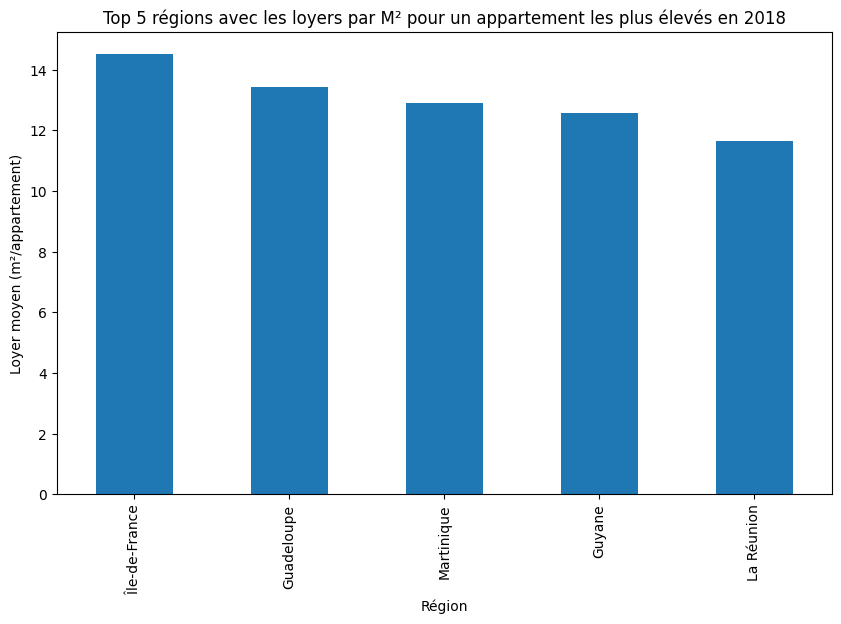

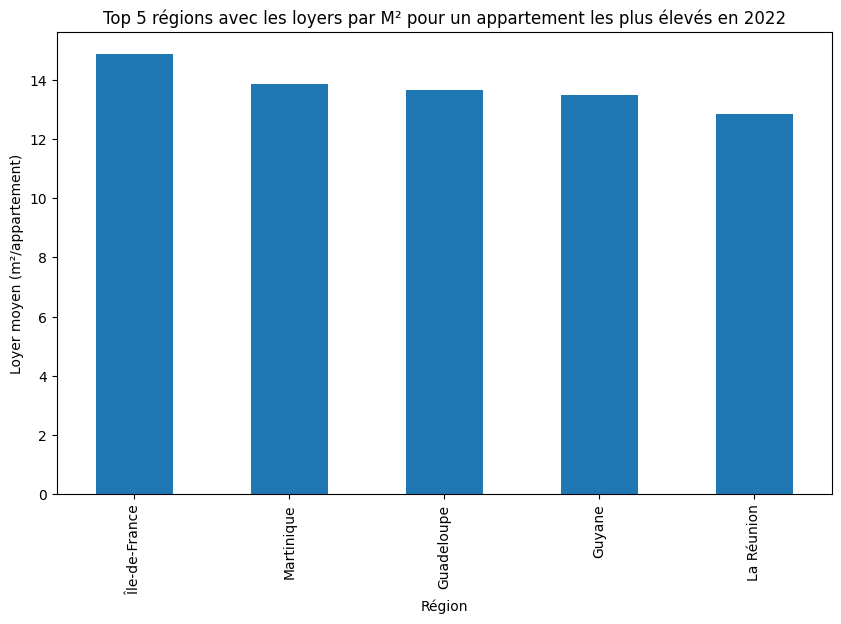

In [56]:
import pandas as pd
import matplotlib.pyplot as plt

# Supposons que df_merged soit votre dataframe

# Créer une liste d'années
years = [2018, 2022]

# Parcourir les années et créer un graphique pour chaque année
for year in years:
    # Filtrer les données pour l'année en cours
    df_year = df_merged[df_merged['date'] == year]

    # Vérifier si le dataframe contient des données
    if len(df_year) > 0:
        # Calculer la moyenne des loyers par région pour l'année en cours
        mean_loyers_region = df_year.groupby('region')['loyer_m2_appartement'].mean()

        # Trier les résultats et obtenir les 5 régions avec les loyers les plus élevés pour l'année en cours
        top_5_regions = mean_loyers_region.nlargest(5)

        # Créer un graphique à barres pour l'année en cours
        top_5_regions.plot(kind='bar', figsize=(10, 6), title=f'Top 5 régions avec les loyers par M² pour un appartement les plus élevés en {year}')
        plt.xlabel('Région')
        plt.ylabel('Loyer moyen (m²/appartement)')
        plt.show()
    else:
        print(f"Aucune donnée trouvée pour l'année {year}")


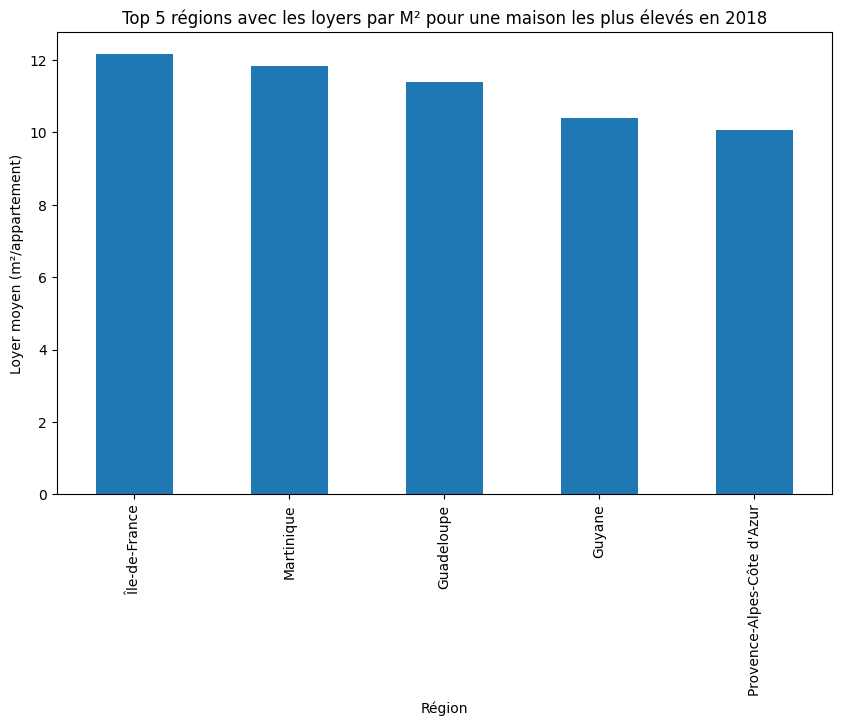

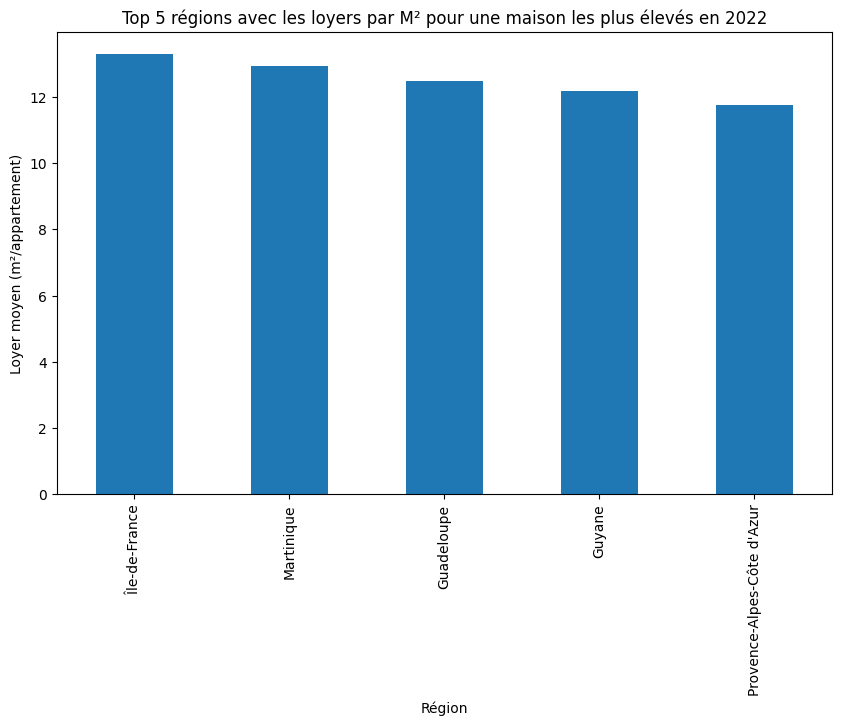

In [58]:
import pandas as pd
import matplotlib.pyplot as plt

# Supposons que df_merged soit votre dataframe

# Créer une liste d'années
years = [2018, 2022]

# Parcourir les années et créer un graphique pour chaque année
for year in years:
    # Filtrer les données pour l'année en cours
    df_year = df_merged[df_merged['date'] == year]

    # Vérifier si le dataframe contient des données
    if len(df_year) > 0:
        # Calculer la moyenne des loyers par région pour l'année en cours
        mean_loyers_region = df_year.groupby('region')['loyer_m2_maison'].mean()

        # Trier les résultats et obtenir les 5 régions avec les loyers les plus élevés pour l'année en cours
        top_5_regions = mean_loyers_region.nlargest(5)

        # Créer un graphique à barres pour l'année en cours
        top_5_regions.plot(kind='bar', figsize=(10, 6), title=f'Top 5 régions avec les loyers par M² pour une maison les plus élevés en {year}')
        plt.xlabel('Région')
        plt.ylabel('Loyer moyen (m²/appartement)')
        plt.show()
    else:
        print(f"Aucune donnée trouvée pour l'année {year}")

Après agencement du dataframe, place à la visualisation des comparaisons et leurs analyses

Comparaison au niveau global

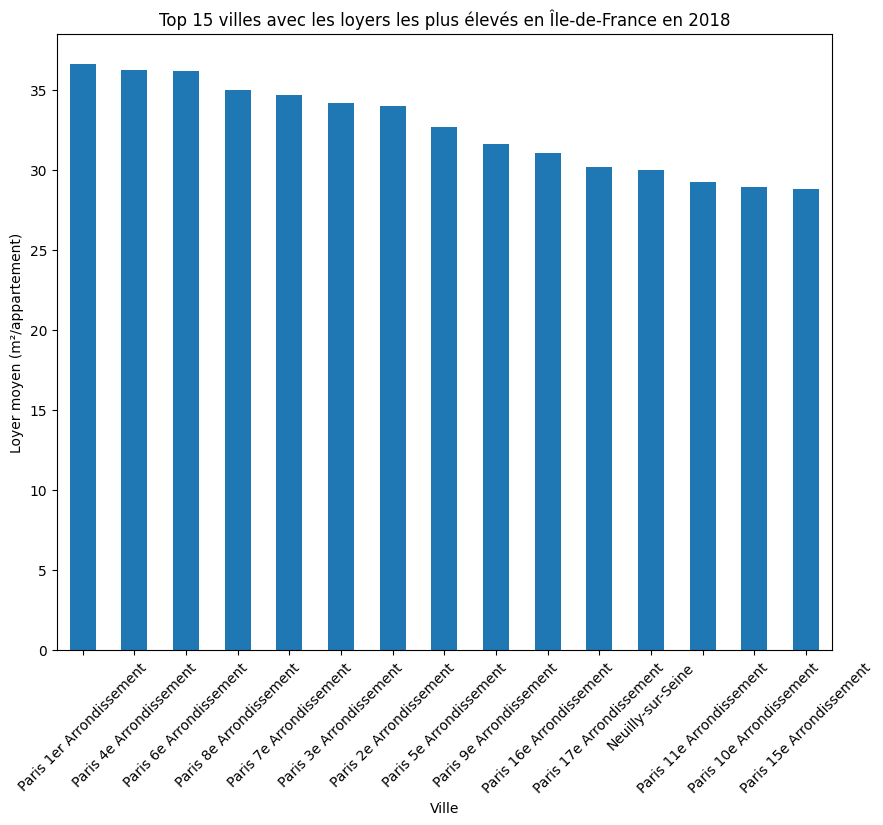

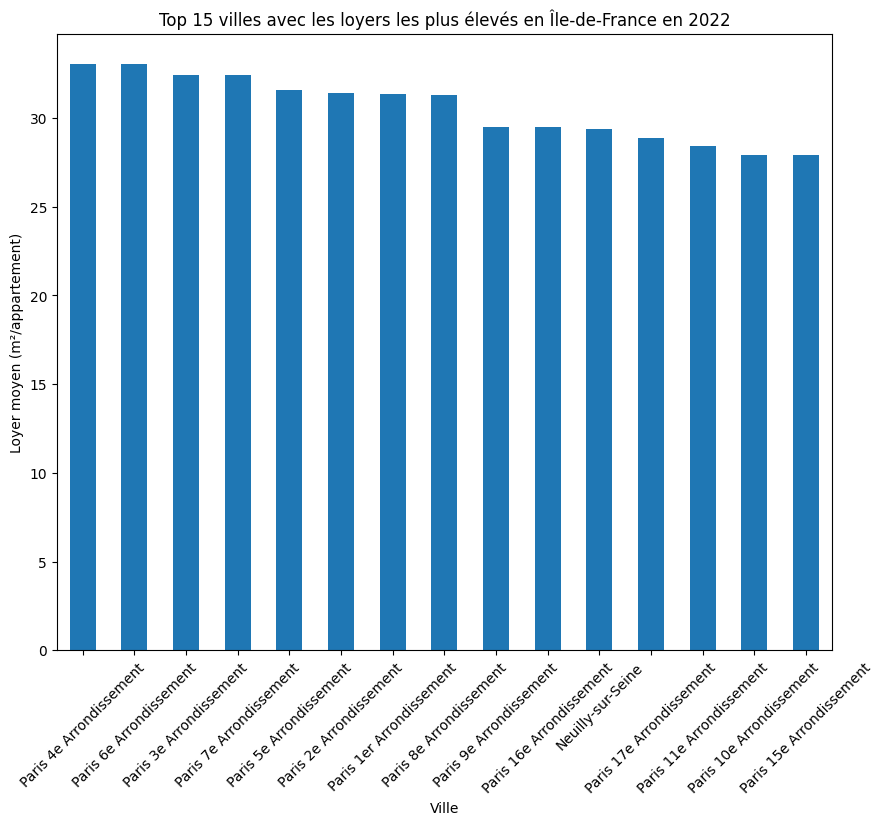

In [59]:
import pandas as pd
import matplotlib.pyplot as plt

# Supposons que df_merged soit votre dataframe

# Filtrer les données pour l'Île-de-France et les années 2018 et 2022
df_ile_de_france = df_merged[(df_merged['region'] == 'Île-de-France') &
                             ((df_merged['date'] == 2018) | (df_merged['date'] == 2022))]

# Créer une liste d'années
years = [2018, 2022]

# Parcourir les années et créer un graphique pour chaque année
for year in years:
    # Filtrer les données pour l'année en cours
    df_year = df_ile_de_france[df_ile_de_france['date'] == year]

    # Calculer la moyenne des loyers par ville pour l'année en cours
    mean_loyers_ville = df_year.groupby('ville')['loyer_m2_appartement'].mean()

    # Trier les résultats et obtenir les 15 villes avec les loyers les plus élevés pour l'année en cours
    top_15_villes = mean_loyers_ville.nlargest(15)

    # Créer un graphique à barres pour l'année en cours
    top_15_villes.plot(kind='bar', figsize=(10, 8), title=f'Top 15 villes avec les loyers les plus élevés en Île-de-France en {year}')
    plt.xlabel('Ville')
    plt.ylabel('Loyer moyen (m²/appartement)')
    plt.xticks(rotation=45)
    plt.show()


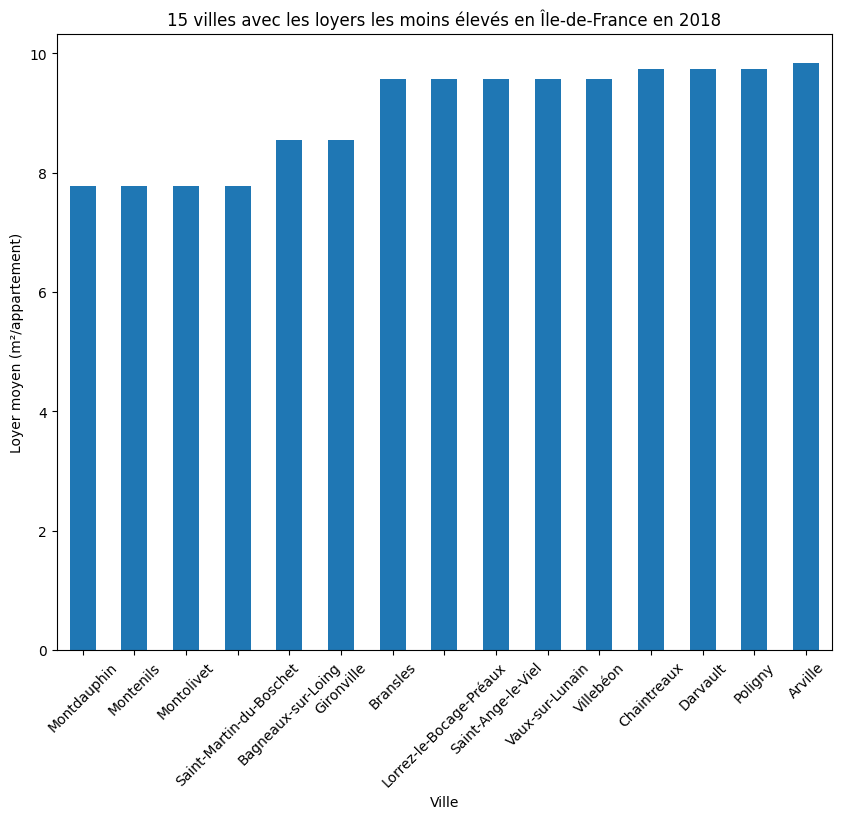

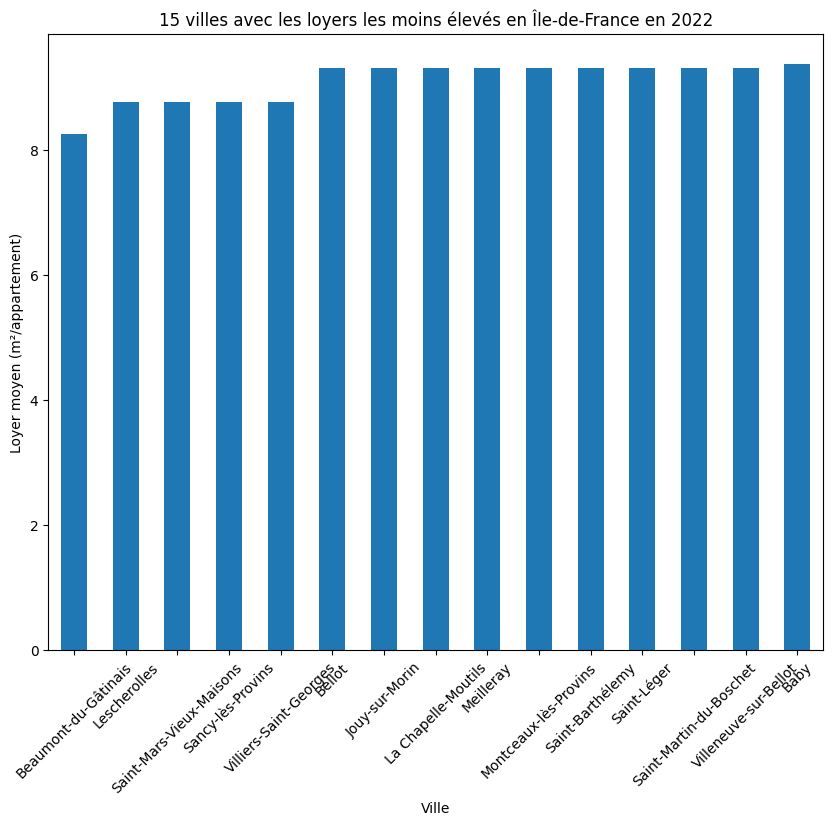

In [60]:
# 15 villes avec le loyer par m2 moins cheres en ile de France 
import pandas as pd
import matplotlib.pyplot as plt

# Supposons que df_merged soit votre dataframe

# Filtrer les données pour l'Île-de-France et les années 2018 et 2022
df_ile_de_france = df_merged[(df_merged['region'] == 'Île-de-France') &
                             ((df_merged['date'] == 2018) | (df_merged['date'] == 2022))]

# Créer une liste d'années
years = [2018, 2022]

# Parcourir les années et créer un graphique pour chaque année
for year in years:
    # Filtrer les données pour l'année en cours
    df_year = df_ile_de_france[df_ile_de_france['date'] == year]

    # Calculer la moyenne des loyers par ville pour l'année en cours
    mean_loyers_ville = df_year.groupby('ville')['loyer_m2_appartement'].mean()

    # Trier les résultats et obtenir les 15 villes avec les loyers les moins élevés pour l'année en cours
    bottom_15_villes = mean_loyers_ville.nsmallest(15)

    # Créer un graphique à barres pour l'année en cours
    bottom_15_villes.plot(kind='bar', figsize=(10, 8), title=f'15 villes avec les loyers les moins élevés en Île-de-France en {year}')
    plt.xlabel('Ville')
    plt.ylabel('Loyer moyen (m²/appartement)')
    plt.xticks(rotation=45)
    plt.show()


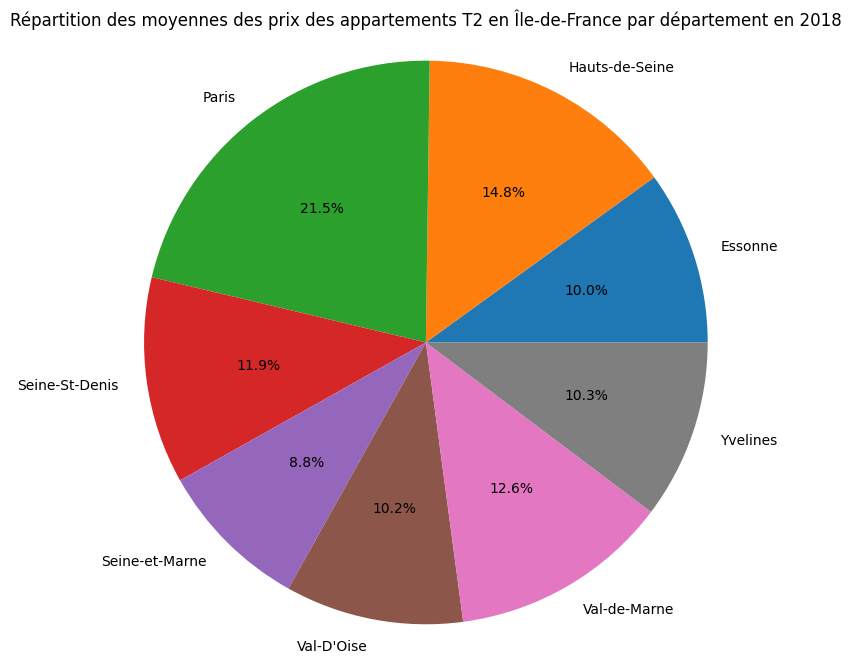

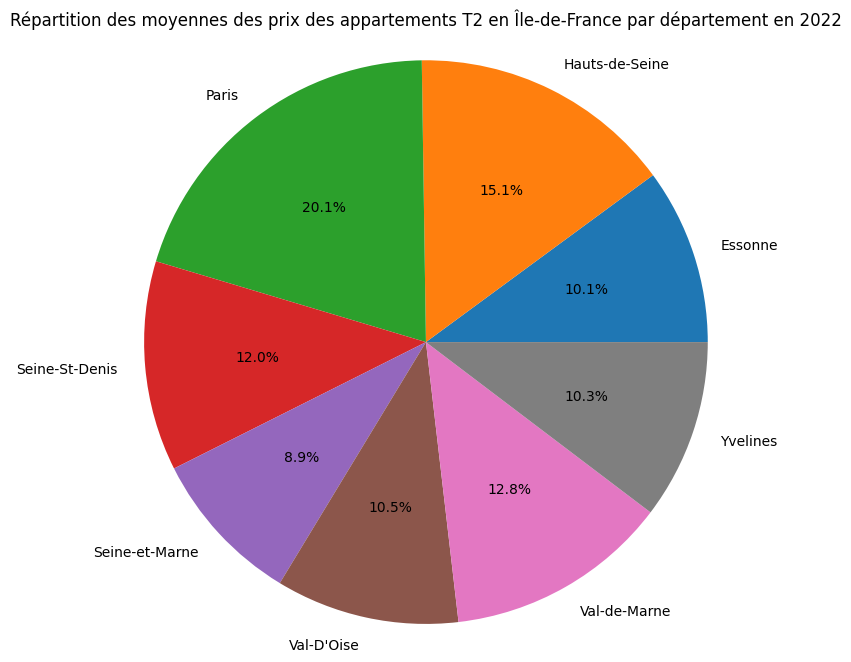

In [63]:
import pandas as pd
import matplotlib.pyplot as plt

# Supposons que df_merged soit votre dataframe

# Filtrer les données pour l'Île-de-France et les années 2018 et 2022
df_ile_de_france = df_merged[(df_merged['region'] == 'Île-de-France') &
                             ((df_merged['date'] == 2018) | (df_merged['date'] == 2022))]

# Créer une liste d'années
years = [2018, 2022]

# Parcourir les années et créer un graphique pour chaque année
for year in years:
    # Filtrer les données pour l'année en cours
    df_year = df_ile_de_france[df_ile_de_france['date'] == year]

    # Calculer la moyenne des prix des appartements T2 par département pour l'année en cours
    mean_prix_t2_departement = df_year.groupby('Département')['prix_appart_t2'].mean()

    # Créer un camembert pour l'année en cours
    plt.figure(figsize=(8, 8))
    plt.pie(mean_prix_t2_departement, labels=mean_prix_t2_departement.index, autopct='%1.1f%%')
    plt.title(f'Répartition des moyennes des prix des appartements T2 en Île-de-France par département en {year}')
    plt.axis('equal')
    plt.show()


In [ ]:
# Quels sont les 15 departements dont les prix d'un T2 sot les ^plus cheres

In [ ]:
# Quel region a les prix grand prix de maison au m2

In [ ]:
# Quelles sont les 5 villes dont les prix moyen sont les plus élévés pour une maison

autre


In [ ]:
# Studio; T2 et maison
# Comparaison des prix par regions
#Comparaisons des prix par annee et par region

In [ ]:
# Studio; T2 et maison
# Comparaison des prix par departement
#Comparaisons des prix par annee et par departement

In [ ]:
# Studio; T2 et maison
# Focus sur l'ile de FRance
# Comparaison des loyers par departement de l'ile de France

In [ ]:
# Studio; T2 et maison
# Comparaison des prix de loyers par rapport à l'ile de france au fil des ans